In [1]:
import pandas as pd
file_path= 'C:/Users/ramya/Downloads/suggestions.csv'
df=pd.read_csv('C:/Users/ramya/Downloads/suggestions.csv')
df.head()

,Recommended,Suggestion_Id,Responses,Views,Votes_Up,Votes_Down,Author_Id,Author_Join (in terms of how many days since they joined),Author_TotalPosts,Author_PostsPerDay
0,0,35463,77,3849,242,7,4886,1615,8977,5.6
1,0,37480,428,28290,1149,201,3654,1617,2543,1.6
2,0,39814,160,7561,648,45,113401,1385,1003,0.7
3,0,41970,89,9937,197,14,8331,1601,223,0.1
4,1,47967,12,6977,0,0,13980,1593,3978,2.5


In [2]:
# Data Exploration

In [3]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 16429
Number of columns: 10


In [4]:
unique_value_counts = df.nunique()

# Display the count of unique values in each column
print(unique_value_counts)


Recommended                                                      2
Suggestion_Id                                                16423
Responses                                                      212
Views                                                         2329
Votes_Up                                                       319
Votes_Down                                                      97
Author_Id                                                     4692
Author_Join (in terms of how many days since they joined)     1252
Author_TotalPosts                                             1006
Author_PostsPerDay                                              54
dtype: int64


In [5]:

unique_value_counts = df.nunique()

# Get the total number of rows in the DataFrame
total_rows = len(df)

# Identify columns with only unique values (same as total number of rows)
unique_columns = unique_value_counts[unique_value_counts == total_rows].index.tolist()

# Display columns with only unique values
print("Columns with only unique values:")
print(unique_columns)


Columns with only unique values:
[]


In [6]:
import pandas as pd

# Assuming 'df' is your DataFrame loaded from the CSV file
# Use value_counts() to count occurrences of each Suggestion ID
repeating_values = df['Suggestion_Id'].value_counts()

# Display the Suggestion IDs with their respective counts of occurrences
print("Repeating values in Suggestion_Id:")
print(repeating_values[repeating_values > 1])


Repeating values in Suggestion_Id:
Suggestion_Id
173402    3
65148     3
177774    2
174389    2
Name: count, dtype: int64


In [7]:
repeating_ids = df['Suggestion_Id'].value_counts()
repeating_ids = repeating_ids[repeating_ids > 1].index.tolist()

# Filter the DataFrame for rows with repeating Suggestion IDs
rows_with_repeating_ids = df[df['Suggestion_Id'].isin(repeating_ids)]

# Display the rows with repeating Suggestion IDs
print("Rows with repeating Suggestion IDs:")
print(rows_with_repeating_ids)


Rows with repeating Suggestion IDs:
      Recommended  Suggestion_Id  Responses  Views  Votes_Up  Votes_Down  \
27              0          65148        166  15303       688          45   
28              0          65148          0      0       688          45   
29              0          65148          0      0       688          45   
4271            0         173402          0      0         0           0   
4272            0         173402          0      0         0           0   
4273            0         173402          0      0         0           0   
4381            0         174389        120  30072       519          76   
4382            0         174389          0      0       519          76   
4766            0         177774        240  10995       652           5   
4767            0         177774          0      0       652           5   

      Author_Id  Author_Join (in terms of how many days since they joined)  \
27        42127                                  

In [8]:
column_info = []

# Iterate through each column
for column in df.columns:
    column_data = {
        'Column Name': column,
        'Data Type': str(df[column].dtype)
    }

    # Check if it's a numeric attribute
    if pd.api.types.is_numeric_dtype(df[column]):
        column_data['Attribute Type'] = 'Numeric'

        # Calculate statistics
        column_data['Min'] = df[column].min()
        column_data['Max'] = df[column].max()
        column_data['Mean'] = df[column].mean()
        column_data['Median'] = df[column].median()
        column_data['Standard Deviation'] = df[column].std()
    
        # For numeric attributes, no top 3 values are applicable
        column_data['Top 3 Values'] = None
    
    # Check if it's a discrete attribute
    elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]):
        column_data['Attribute Type'] = 'Discrete'

        # Calculate unique values
        unique_values = df[column].nunique()
        column_data['Unique Values'] = unique_values

        # Handle top 3 values
        if unique_values <= 3:
            top_3_values = df[column].value_counts().to_dict()
        else:
            top_3_values = dict(df[column].value_counts().head(3))
        column_data['Top 3 Values'] = top_3_values
    
    # Check for missing values
    missing_percentage = df[column].isnull().mean() * 100
    column_data['Missingness (%)'] = missing_percentage

    # Append column information to the list
    column_info.append(column_data)

# Create a DataFrame from the list of column information
column_info_df = pd.DataFrame(column_info)

# Display the results
print(column_info_df)

                                         Column Name Data Type Attribute Type  \
0                                        Recommended     int64        Numeric   
1                                      Suggestion_Id     int64        Numeric   
2                                          Responses     int64        Numeric   
3                                              Views     int64        Numeric   
4                                           Votes_Up     int64        Numeric   
5                                         Votes_Down     int64        Numeric   
6                                          Author_Id     int64        Numeric   
7  Author_Join (in terms of how many days since t...     int64        Numeric   
8                                  Author_TotalPosts     int64        Numeric   
9                                 Author_PostsPerDay   float64        Numeric   

       Min        Max           Mean    Median  Standard Deviation  \
0      0.0        1.0       0.034208  

In [9]:
import pandas as pd

# Assuming 'df' is your DataFrame loaded from the CSV file
# Use describe() to get basic statistics of numerical columns
numerical_stats = df.describe()

# Display basic statistics (mean, median, std, min, max, quartiles, etc.)
print("Basic statistics of numerical columns:")
print(numerical_stats)


Basic statistics of numerical columns:
        Recommended  Suggestion_Id     Responses         Views      Votes_Up  \
count  16429.000000   16429.000000  16429.000000  16429.000000  16429.000000   
mean       0.034208  208537.753302     15.238176    520.507822     14.801144   
std        0.181768   49975.636214     25.518443   1533.486149     50.707993   
min        0.000000   35463.000000      0.000000      0.000000      0.000000   
25%        0.000000  171785.000000      3.000000     94.000000      0.000000   
50%        0.000000  208917.000000      8.000000    180.000000      2.000000   
75%        0.000000  249687.000000     17.000000    409.000000      9.000000   
max        1.000000  300460.000000    959.000000  63243.000000   2607.000000   

         Votes_Down     Author_Id  \
count  16429.000000  1.642900e+04   
mean       3.756224  6.477254e+05   
std        7.702373  4.370285e+05   
min        0.000000  1.800000e+01   
25%        0.000000  2.827200e+05   
50%        1.00000

In [10]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("profiling_report_GP.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Data Cleaning

In [12]:
# checking Null values

missing_count = df.isnull().sum()

# Calculate the total count of missing values
total_missing = missing_count.sum()

# Calculate the percentage of missing values
total_rows = len(df)
percent_missing = (total_missing / (total_rows * len(df.columns))) * 100
print("Count of Missing Values:")
print(missing_count)
print("\nTotal Missing Values:", total_missing)
print("Percentage of Missing Values: {:.2f}%".format(percent_missing))

Count of Missing Values:
Recommended                                                  0
Suggestion_Id                                                0
Responses                                                    0
Views                                                        0
Votes_Up                                                     0
Votes_Down                                                   0
Author_Id                                                    0
Author_Join (in terms of how many days since they joined)    0
Author_TotalPosts                                            0
Author_PostsPerDay                                           0
dtype: int64

Total Missing Values: 0
Percentage of Missing Values: 0.00%


In [13]:
# check for Duplicates

duplicates = df[df.duplicated()]
total_duplicates = df.duplicated().sum()

# Display the total count of duplicates
print("Total Count of Duplicates:", total_duplicates)
duplicate_columns = df.columns[df.apply(lambda x: x.duplicated()).any()]

# Display the columns with duplicates
print("Columns with duplicate values:")
print(duplicate_columns)

Total Count of Duplicates: 3
Columns with duplicate values:
Index(['Recommended', 'Suggestion_Id', 'Responses', 'Views', 'Votes_Up',
       'Votes_Down', 'Author_Id',
       'Author_Join (in terms of how many days since they joined)',
       'Author_TotalPosts', 'Author_PostsPerDay'],
      dtype='object')


In [14]:
#Handling duplicates

df =df[~df.duplicated()]
duplicates = df[df.duplicated()]
total_duplicates = df.duplicated().sum()

# Display the total count of duplicates
print("Total Count of Duplicates:", total_duplicates)

Total Count of Duplicates: 0


In [15]:
# Loading the dataset again

# Step 1: Check for and remove exact duplicates based on "Suggestion_Id"
df = df.drop_duplicates(subset='Suggestion_Id')

# Step 2: For each unique "Suggestion_Id", remove rows where more than two of the other columns are 0
# Selecting columns to be checked for zero values
columns_to_check = ['Responses', 'Views', 'Votes_Up', 'Votes_Down', 'Author_TotalPosts', 'Author_PostsPerDay']

# Function to check if more than two columns have zero values
def more_than_two_zeros(row):
    zero_count = sum(row[col] == 0 for col in columns_to_check)
    return zero_count > 2

# Filtering the dataset
filtered_dataset = df[~df.apply(more_than_two_zeros, axis=1)]

df = filtered_dataset

# Displaying the first few rows of the modified dataset
df.head()


,Recommended,Suggestion_Id,Responses,Views,Votes_Up,Votes_Down,Author_Id,Author_Join (in terms of how many days since they joined),Author_TotalPosts,Author_PostsPerDay
0,0,35463,77,3849,242,7,4886,1615,8977,5.6
1,0,37480,428,28290,1149,201,3654,1617,2543,1.6
2,0,39814,160,7561,648,45,113401,1385,1003,0.7
3,0,41970,89,9937,197,14,8331,1601,223,0.1
4,1,47967,12,6977,0,0,13980,1593,3978,2.5


In [16]:
# Finding the columns with unique values in the dataset
unique_columns = [col for col in df.columns if df[col].nunique() == df.shape[0]]

unique_columns

['Suggestion_Id']

In [17]:
# checking whether we need data tupe conversion

data_types = df.dtypes
data_types

Recommended                                                    int64
Suggestion_Id                                                  int64
Responses                                                      int64
Views                                                          int64
Votes_Up                                                       int64
Votes_Down                                                     int64
Author_Id                                                      int64
Author_Join (in terms of how many days since they joined)      int64
Author_TotalPosts                                              int64
Author_PostsPerDay                                           float64
dtype: object

In [18]:
# Using .loc to ensure that the operation is performed on the original DataFrame
df.loc[:, 'Author_PostsPerDay'] = df['Author_PostsPerDay'].astype(int)

# Alternatively, if df is indeed a copy and you want to suppress this warning and make the change:
df = df.copy()
df['Author_PostsPerDay'] = df['Author_PostsPerDay'].astype(int)



In [19]:
# Assuming 'df' is your DataFrame
df.loc[:, 'Suggestion_Id'] = df['Suggestion_Id'].astype(int).astype('object')
df.loc[:, 'Author_Id'] = df['Author_Id'].astype(int).astype('object')

# Check the data types to confirm the conversion
print(df.dtypes)


Recommended                                                   int64
Suggestion_Id                                                object
Responses                                                     int64
Views                                                         int64
Votes_Up                                                      int64
Votes_Down                                                    int64
Author_Id                                                    object
Author_Join (in terms of how many days since they joined)     int64
Author_TotalPosts                                             int64
Author_PostsPerDay                                            int32
dtype: object


In [20]:
column_info = []

# Iterate through each column
for column in df.columns:
    column_data = {
        'Column Name': column,
        'Data Type': str(df[column].dtype)
    }

    # Check if it's a numeric attribute
    if pd.api.types.is_numeric_dtype(df[column]):
        column_data['Attribute Type'] = 'Numeric'

        # Calculate statistics
        column_data['Min'] = df[column].min()
        column_data['Max'] = df[column].max()
        column_data['Mean'] = df[column].mean()
        column_data['Median'] = df[column].median()
        column_data['Standard Deviation'] = df[column].std()
    
        # For numeric attributes, no top 3 values are applicable
        column_data['Top 3 Values'] = None
    
    # Check if it's a discrete attribute
    elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]):
        column_data['Attribute Type'] = 'Discrete'

        # Calculate unique values
        unique_values = df[column].nunique()
        column_data['Unique Values'] = unique_values

        # Handle top 3 values
        if unique_values <= 3:
            top_3_values = df[column].value_counts().to_dict()
        else:
            top_3_values = dict(df[column].value_counts().head(3))
        column_data['Top 3 Values'] = top_3_values
    
    # Check for missing values
    missing_percentage = df[column].isnull().mean() * 100
    column_data['Missingness (%)'] = missing_percentage

    # Append column information to the list
    column_info.append(column_data)

# Create a DataFrame from the list of column information
column_info_df = pd.DataFrame(column_info)

# Display the results
print(column_info_df)

                                         Column Name Data Type Attribute Type  \
0                                        Recommended     int64        Numeric   
1                                      Suggestion_Id    object            NaN   
2                                          Responses     int64        Numeric   
3                                              Views     int64        Numeric   
4                                           Votes_Up     int64        Numeric   
5                                         Votes_Down     int64        Numeric   
6                                          Author_Id    object            NaN   
7  Author_Join (in terms of how many days since t...     int64        Numeric   
8                                  Author_TotalPosts     int64        Numeric   
9                                 Author_PostsPerDay     int32        Numeric   

   Min      Max         Mean  Median  Standard Deviation  Top 3 Values  \
0  0.0      1.0     0.038454     0

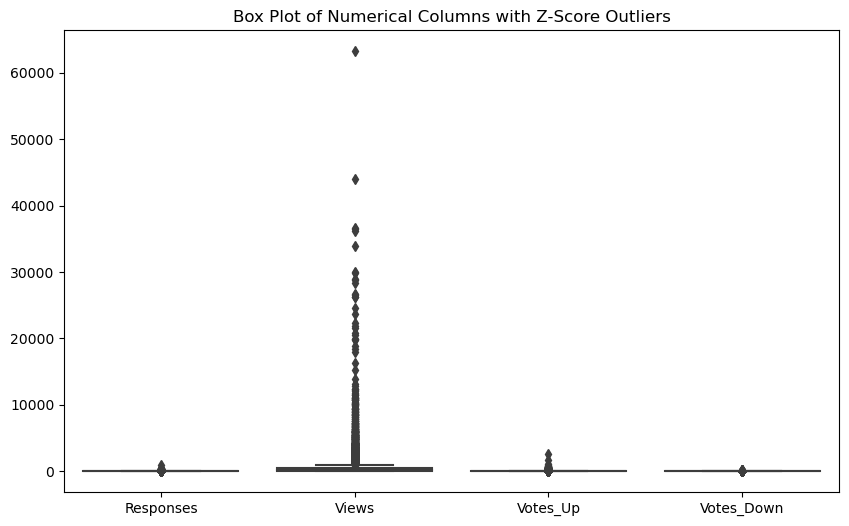

{'Responses': 262, 'Views': 164, 'Votes_Up': 197, 'Votes_Down': 202}

In [21]:
from scipy import stats
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you have these columns
numerical_columns = ['Responses', 'Views', 'Votes_Up', 'Votes_Down']

# Function to calculate Z-score and identify outliers
def find_outliers_zscore(df, column):
    z_scores = stats.zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    outliers = df[abs_z_scores > 3]
    return outliers

# Calculating outliers using Z-score for each specified column
outliers_zscore = {}
for column in numerical_columns:
    outliers_zscore[column] = find_outliers_zscore(df, column)

# Visualizing the outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot of Numerical Columns with Z-Score Outliers')
plt.show()

# Displaying a summary of the identified outliers
outliers_zscore_summary = {column: outliers.shape[0] for column, outliers in outliers_zscore.items()}
outliers_zscore_summary


In [22]:
# Removing outliers using Z-score method
df_no_outliers_zscore = df.copy()
for column in numerical_columns:
    z_scores = np.abs(stats.zscore(df_no_outliers_zscore[column]))
    df_no_outliers_zscore = df_no_outliers_zscore[z_scores <= 3]

# Calculating the impact of removing outliers
original_row_count = df.shape[0]
new_row_count_zscore = df_no_outliers_zscore.shape[0]
percentage_decrease_zscore = ((original_row_count - new_row_count_zscore) / original_row_count) * 100

# Output the results
print("Original row count:", original_row_count)
print("New row count after removing outliers:", new_row_count_zscore)
print("Percentage decrease in data:", percentage_decrease_zscore)

Original row count: 14563
New row count after removing outliers: 13545
Percentage decrease in data: 6.990317928998147


In [23]:
df=df_no_outliers_zscore

In [24]:

df['Responses'] = df['Responses'].round().astype(int)
df['Views'] = df['Views'].round().astype(int)
df['Votes_Up'] = df['Votes_Up'].round().astype(int)
df['Votes_Down'] = df['Votes_Down'].round().astype(int)

# Assuming 'Author_TotalPosts' and 'Author_PostsPerDay' are already integer values.
# If they are not, convert them as well using the same method

# Now, df should have the numerical columns as integers
print(df.head())

    Recommended Suggestion_Id  Responses  Views  Votes_Up  Votes_Down  \
14            0         58892          0      0        48           3   
15            0         58921          0      0        59           8   
21            0         63554          0      0        54           6   
30            0         65519          0      0         2           2   
33            0         66666         25    443        10           0   

   Author_Id  Author_Join (in terms of how many days since they joined)  \
14    194538                                               1347           
15      4886                                               1615           
21    155751                                               1368           
30    208196                                               1340           
33     12488                                               1595           

    Author_TotalPosts  Author_PostsPerDay  
14               1190                   0  
15               8977 

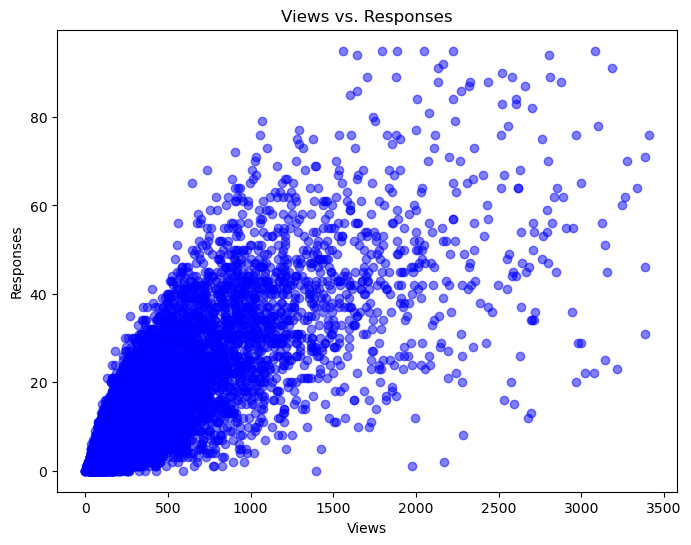

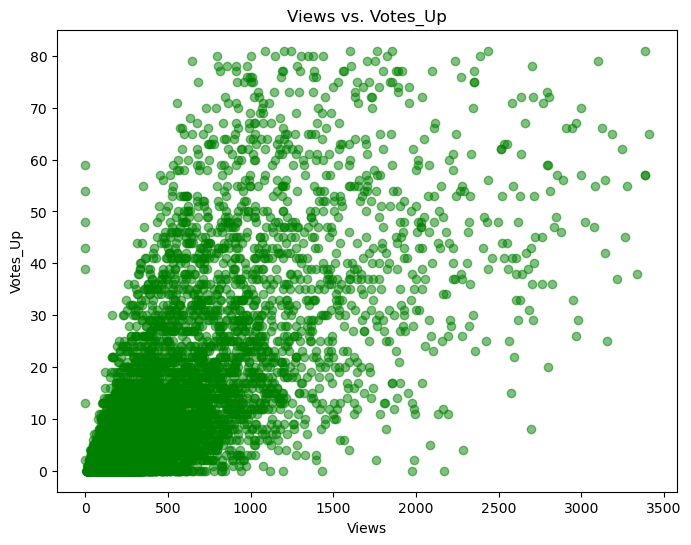

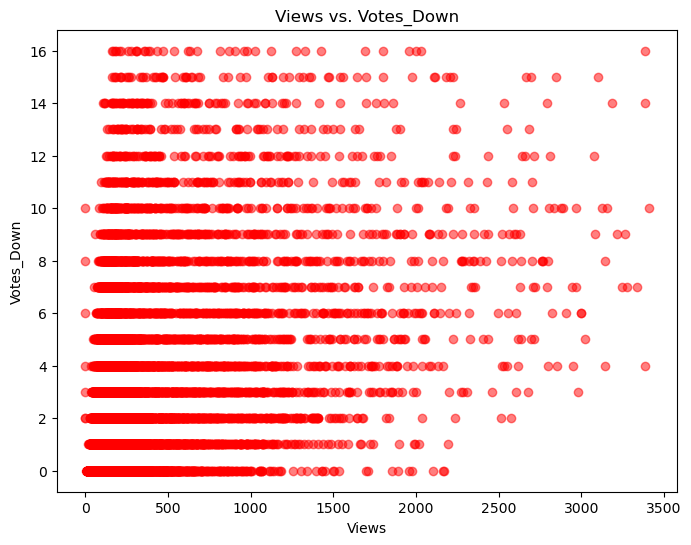

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame here
# df = pd.read_csv('path_to_your_dataset.csv')

# Scatter plot for Views vs. Responses
plt.figure(figsize=(8, 6))
plt.scatter(df['Views'], df['Responses'], color='blue', alpha=0.5)
plt.xlabel('Views')
plt.ylabel('Responses')
plt.title('Views vs. Responses')
plt.show()

# Scatter plot for Views vs. Votes_Up
plt.figure(figsize=(8, 6))
plt.scatter(df['Views'], df['Votes_Up'], color='green', alpha=0.5)
plt.xlabel('Views')
plt.ylabel('Votes_Up')
plt.title('Views vs. Votes_Up')
plt.show()

# Scatter plot for Views vs. Votes_Down
plt.figure(figsize=(8, 6))
plt.scatter(df['Views'], df['Votes_Down'], color='red', alpha=0.5)
plt.xlabel('Views')
plt.ylabel('Votes_Down')
plt.title('Views vs. Votes_Down')
plt.show()


In [26]:
import pandas as pd

# Shape of the dataset before applying the conditions
shape_before = df.shape

# Shape of the dataset if 'Views' equals 0
shape_views_zero = df[df['Views'] == 0].shape

# Shape of the dataset if 'Responses' is greater than 'Views'
shape_responses_greater_views = df[df['Responses'] > df['Views']].shape

# Print the shapes
print("Shape before applying conditions:", shape_before)
print("Shape when 'Views' equals 0:", shape_views_zero)
print("Shape when 'Responses' is greater than 'Views':", shape_responses_greater_views)


Shape before applying conditions: (13545, 10)
Shape when 'Views' equals 0: (7, 10)
Shape when 'Responses' is greater than 'Views': (0, 10)


In [27]:
import pandas as pd


# Shape of the dataset before applying the conditions
shape_before = df.shape

# Shape of the dataset when 'Views' equals 0
shape_views_zero = df[df['Views'] == 0].shape

# Shape of the dataset when 'Responses' is greater than 'Views'
shape_responses_greater_than_views = df[df['Responses'] > df['Views']].shape

# Shape of the dataset when 'Views' is less than 'Votes_Up'
shape_views_less_than_votes_up = df[df['Views'] < df['Votes_Up']].shape

# Shape of the dataset when 'Views' is less than 'Votes_Down'
shape_views_less_than_votes_down = df[df['Views'] < df['Votes_Down']].shape

# Shape of the dataset when 'Views' is less than the sum of 'Votes_Up' and 'Votes_Down'
shape_views_less_than_votes_sum = df[df['Views'] < (df['Votes_Up'] + df['Votes_Down'])].shape

# Print the shapes
print("Shape before applying conditions:", shape_before)
print("Shape when 'Views' equals 0:", shape_views_zero)
print("Shape when 'Responses' is greater than 'Views':", shape_responses_greater_than_views)
print("Shape when 'Views' < 'Votes_Up':", shape_views_less_than_votes_up)
print("Shape when 'Views' < 'Votes_Down':", shape_views_less_than_votes_down)
print("Shape when 'Views' < 'Votes_Up' + 'Votes_Down':", shape_views_less_than_votes_sum)


Shape before applying conditions: (13545, 10)
Shape when 'Views' equals 0: (7, 10)
Shape when 'Responses' is greater than 'Views': (0, 10)
Shape when 'Views' < 'Votes_Up': (7, 10)
Shape when 'Views' < 'Votes_Down': (7, 10)
Shape when 'Views' < 'Votes_Up' + 'Votes_Down': (7, 10)


In [28]:
import pandas as pd


# Define the conditions
condition_1 = df['Views'] == 0
condition_2 = df['Responses'] > df['Views']
condition_3 = df['Views'] < df['Votes_Up']
condition_4 = df['Views'] < df['Votes_Down']
condition_5 = df['Views'] < (df['Votes_Up'] + df['Votes_Down'])

# Combine the conditions
combined_condition = condition_1 | condition_2 | condition_3 | condition_4 | condition_5

# Apply the combined condition to remove the rows
df2 = df[~combined_condition]

# Shape of the dataset after removing the rows
print("Shape of the dataset after applying conditions:", df2.shape)


Shape of the dataset after applying conditions: (13538, 10)


In [29]:
df.shape


(13545, 10)

In [30]:
df2.shape

(13538, 10)

In [31]:
df=df2

In [32]:
df.shape

(13538, 10)

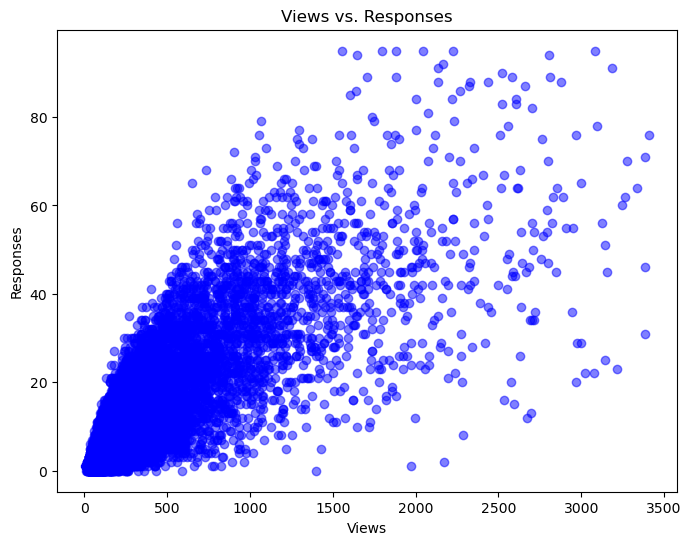

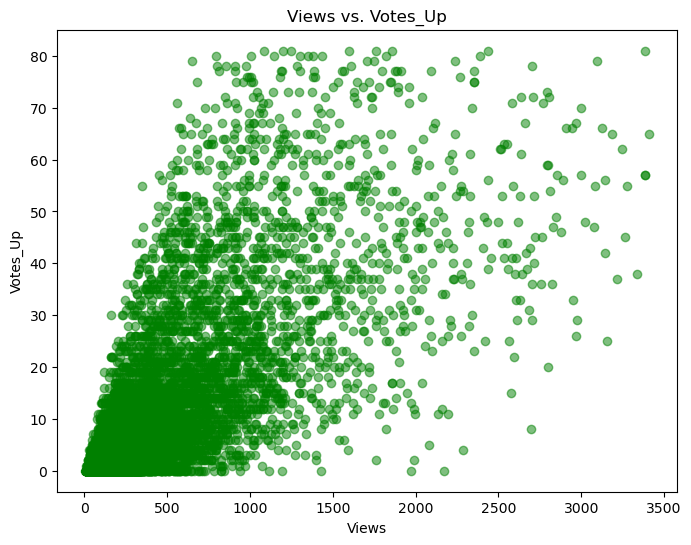

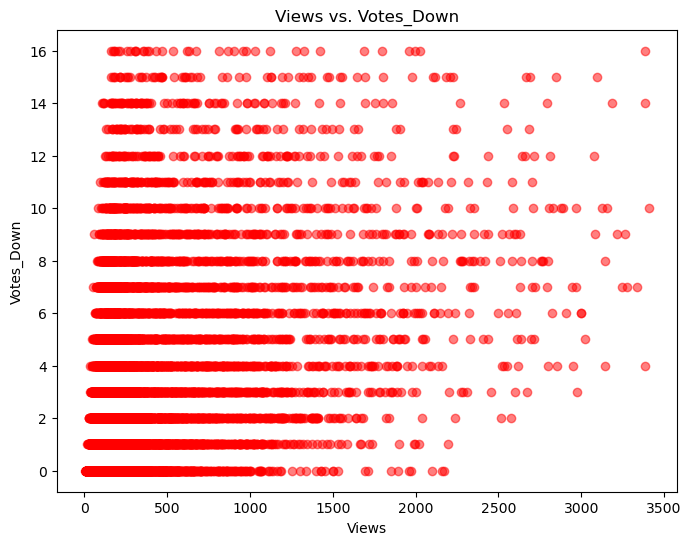

In [33]:
import matplotlib.pyplot as plt
import pandas as pd


# Scatter plot for Views vs. Responses
plt.figure(figsize=(8, 6))
plt.scatter(df['Views'], df['Responses'], color='blue', alpha=0.5)
plt.xlabel('Views')
plt.ylabel('Responses')
plt.title('Views vs. Responses')
plt.show()

# Scatter plot for Views vs. Votes_Up
plt.figure(figsize=(8, 6))
plt.scatter(df['Views'], df['Votes_Up'], color='green', alpha=0.5)
plt.xlabel('Views')
plt.ylabel('Votes_Up')
plt.title('Views vs. Votes_Up')
plt.show()

# Scatter plot for Views vs. Votes_Down
plt.figure(figsize=(8, 6))
plt.scatter(df['Views'], df['Votes_Down'], color='red', alpha=0.5)
plt.xlabel('Views')
plt.ylabel('Votes_Down')
plt.title('Views vs. Votes_Down')
plt.show()


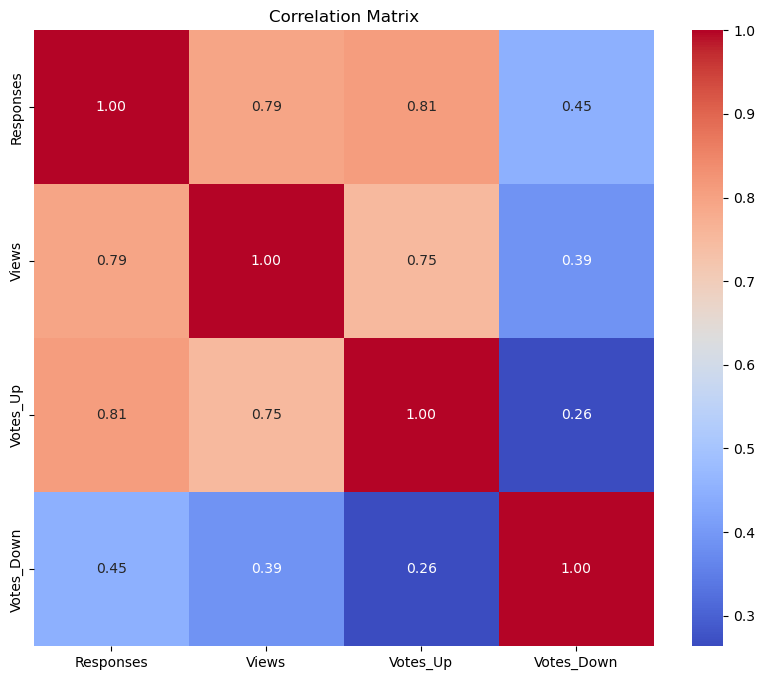

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numeric_columns = ['Responses', 'Views', 'Votes_Up', 'Votes_Down']  # Adjust as per your dataset

# Convert relevant columns to numeric using .loc
for col in numeric_columns:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

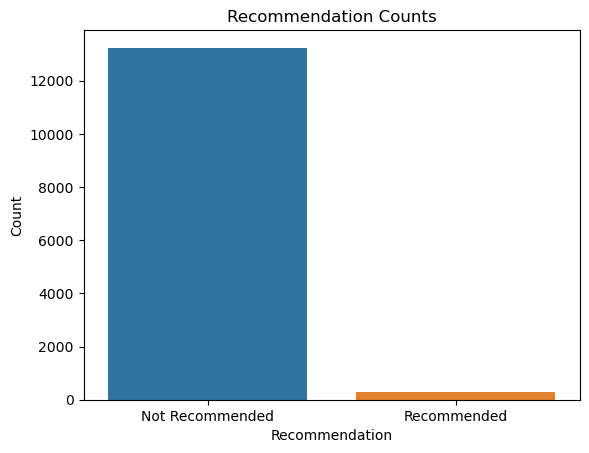

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has a 'Recommendation' column
recommendation_counts = df['Recommended'].value_counts()

# Creating a bar chart
sns.barplot(x=recommendation_counts.index, y=recommendation_counts.values)

# Adding titles and labels
plt.title('Recommendation Counts')
plt.xlabel('Recommendation')
plt.ylabel('Count')

# If the 'Recommendation' column contains 0s and 1s
plt.xticks(ticks=[0, 1], labels=['Not Recommended', 'Recommended'])

plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df.drop('Recommended', axis=1)
y = df['Recommended']
# Splitting the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-defining and evaluating the models with the standardized data
model_performance = {}

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the metrics
    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }


    
performance_df = pd.DataFrame(model_performance).T

# Calculate the baseline accuracy: the proportion of the majority class in the test set
baseline_accuracy = y_test.value_counts(normalize=True).max()

# Convert the model performance dictionary into a DataFrame
performance_df = pd.DataFrame(model_performance).T

# Adding the baseline accuracy to the performance DataFrame
performance_df['Baseline Accuracy'] = baseline_accuracy

# Displaying the performance metrics for each model
performance_df.reset_index().rename(columns={'index': 'Model'})
  





,Model,Accuracy,Precision,Recall,F1 Score,Baseline Accuracy
0,Logistic Regression,0.979813,0.562500,0.400000,0.467532,0.977843
1,Random Forest,0.982029,0.666667,0.377778,0.482270,0.977843
2,Gradient Boosting,0.981782,0.629032,0.433333,0.513158,0.977843
3,Support Vector Machine,0.982029,0.697674,0.333333,0.451128,0.977843
4,K-Nearest Neighbors,0.982767,0.628205,0.544444,0.583333,0.977843
5,Naive Bayes,0.933284,0.233038,0.877778,0.368298,0.977843


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Redefine the features and target variable from the original dataset
X = df.drop('Recommended', axis=1)
y = df['Recommended']

# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a logistic regression model with class_weight='balanced'
lr_weighted = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Fit the model on the training data
lr_weighted.fit(X_train, y_train)

# Predict on the test data
y_pred_weighted = lr_weighted.predict(X_test)

# Generate a classification report for the weighted model
report_weighted = classification_report(y_test, y_pred_weighted, target_names=['Not Recommended', 'Recommended'])

# Output the classification report
report_weighted


'                 precision    recall  f1-score   support\n\nNot Recommended       1.00      0.94      0.97      3972\n    Recommended       0.29      0.99      0.45        90\n\n       accuracy                           0.95      4062\n      macro avg       0.64      0.97      0.71      4062\n   weighted avg       0.98      0.95      0.96      4062\n'

In [38]:
print("Performance before class weight:")
print(performance_df.loc['Logistic Regression'])

print("\nPerformance after applying class weight:")
print({
    "Accuracy": accuracy_score(y_test, y_pred_weighted),
    "Precision": precision_score(y_test, y_pred_weighted),
    "Recall": recall_score(y_test, y_pred_weighted),
    "F1 Score": f1_score(y_test, y_pred_weighted)
})

Performance before class weight:
Accuracy             0.979813
Precision            0.562500
Recall               0.400000
F1 Score             0.467532
Baseline Accuracy    0.977843
Name: Logistic Regression, dtype: float64

Performance after applying class weight:
{'Accuracy': 0.9453471196454948, 'Precision': 0.2870967741935484, 'Recall': 0.9888888888888889, 'F1 Score': 0.44500000000000006}


In [39]:
# As we cannot implement SMOTE in this environment, I will provide the code for you to execute in your local environment.

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

# Separate the features and the target variable
X = df.drop('Recommended', axis=1)
y = df['Recommended']

# Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Initialize a logistic regression model
lr_smote = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
lr_smote.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_smote = lr_smote.predict(X_test_smote)

# Generate a classification report for the model trained on SMOTE-balanced data
report_smote = classification_report(y_test_smote, y_pred_smote, target_names=['Not Recommended', 'Recommended'])

print("Classification Report for Logistic Regression on SMOTE-balanced data:")
print(report_smote)


Classification Report for Logistic Regression on SMOTE-balanced data:
                 precision    recall  f1-score   support

Not Recommended       0.99      0.95      0.97      3915
    Recommended       0.95      0.99      0.97      4031

       accuracy                           0.97      7946
      macro avg       0.97      0.97      0.97      7946
   weighted avg       0.97      0.97      0.97      7946



In [40]:
# Assuming you have the classification report from the original imbalanced dataset
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming df is already defined and includes the 'Recommended' column
X = df.drop('Recommended', axis=1)
y = df['Recommended']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Initialize a logistic regression model without class_weight='balanced'
lr_original = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the original training data
lr_original.fit(X_train_original, y_train_original)

# Predict on the original test data
y_pred_original = lr_original.predict(X_test_original)

# Generate a classification report for the original model
report_original = classification_report(y_test_original, y_pred_original, target_names=['Not Recommended', 'Recommended'])

# Now you can print it
print("Classification Report for the Original Data:")
print(report_original)

print("\nClassification Report for SMOTE-balanced Data:")
print(report_smote)

# Predict on the original test data
y_pred_original_test = lr_smote.predict(X_test)

# Generate a classification report for the SMOTE model on original test data
report_smote_on_original_test = classification_report(y_test, y_pred_original_test, target_names=['Not Recommended', 'Recommended'])

print("Classification Report for Logistic Regression trained on SMOTE data but evaluated on Original Test Data:")
print(report_smote_on_original_test)

Classification Report for the Original Data:
                 precision    recall  f1-score   support

Not Recommended       0.98      0.99      0.99      3972
    Recommended       0.52      0.29      0.37        90

       accuracy                           0.98      4062
      macro avg       0.75      0.64      0.68      4062
   weighted avg       0.97      0.98      0.98      4062


Classification Report for SMOTE-balanced Data:
                 precision    recall  f1-score   support

Not Recommended       0.99      0.95      0.97      3915
    Recommended       0.95      0.99      0.97      4031

       accuracy                           0.97      7946
      macro avg       0.97      0.97      0.97      7946
   weighted avg       0.97      0.97      0.97      7946

Classification Report for Logistic Regression trained on SMOTE data but evaluated on Original Test Data:
                 precision    recall  f1-score   support

Not Recommended       1.00      0.95      0.97      39

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler



# Prepare the data
X = df.drop('Recommended', axis=1)
y = df['Recommended']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the individual classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GradientBoostingClassifier(random_state=42)

# Create an ensemble of classifiers
ensemble_clf = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('gbc', clf3)], voting='hard')

# Train the ensemble classifier
ensemble_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test)

# Generate a classification report
report_ensemble = classification_report(y_test, y_pred_ensemble, target_names=['Not Recommended', 'Recommended'])

print("Classification Report for Ensemble Classifier:")
print(report_ensemble)


Classification Report for Ensemble Classifier:
                 precision    recall  f1-score   support

Not Recommended       0.99      1.00      0.99      3972
    Recommended       0.67      0.42      0.52        90

       accuracy                           0.98      4062
      macro avg       0.83      0.71      0.75      4062
   weighted avg       0.98      0.98      0.98      4062



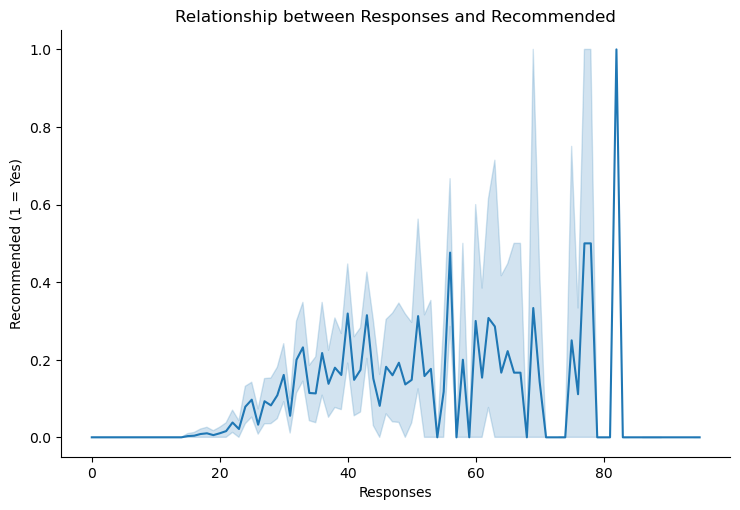

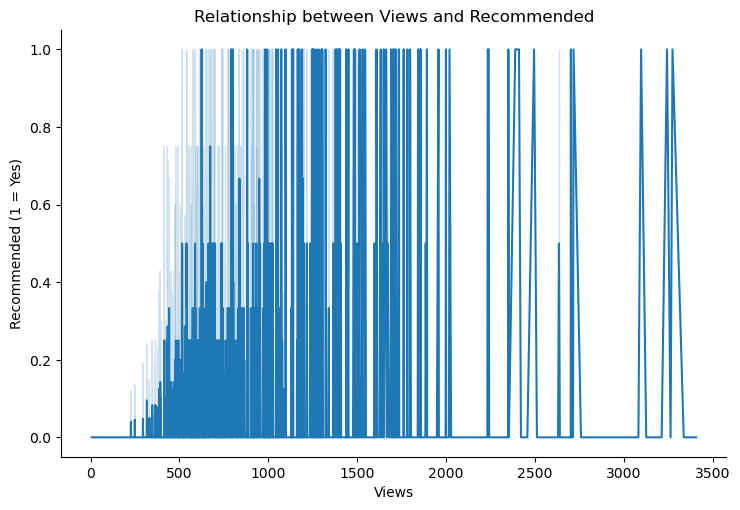

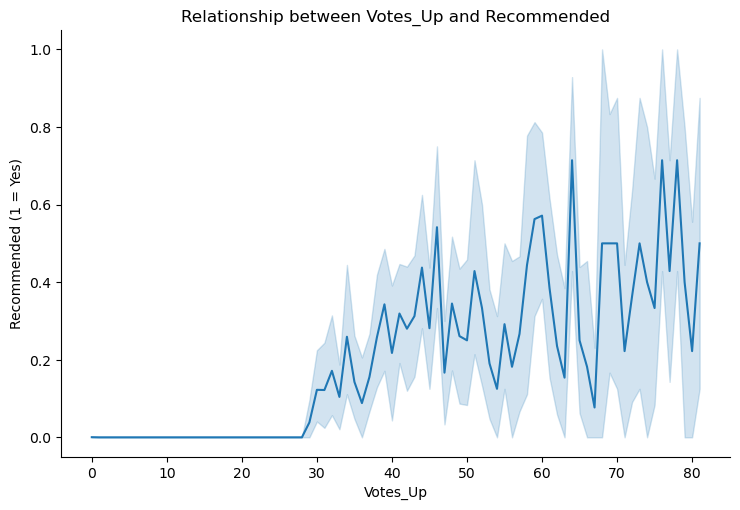

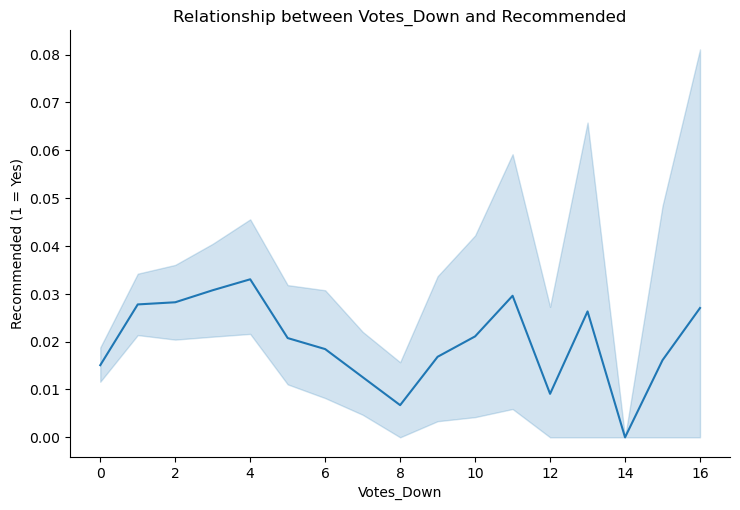

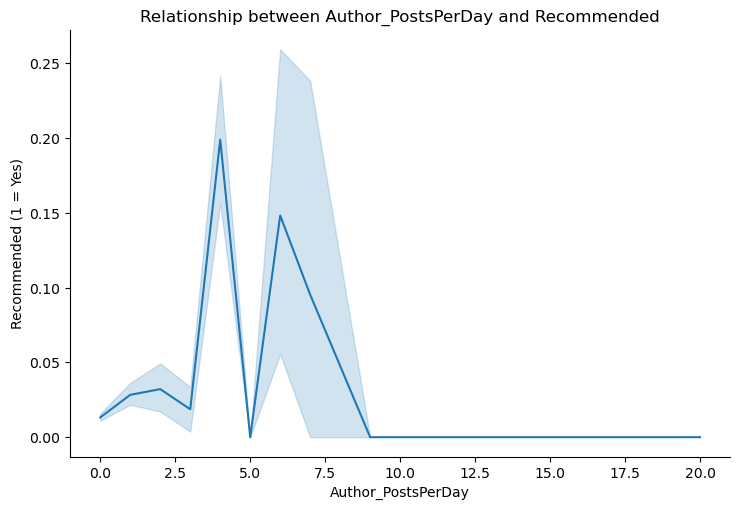

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')
# Extracting numerical columns for plotting
numerical_columns = df.select_dtypes(include=['int32', 'float64']).columns

# Plotting relational graphs for each numerical column against 'Recommended'
for col in numerical_columns:
    if col != 'Recommended':  # Avoid plotting 'Recommended' with itself
        sns.relplot(x=col, y='Recommended', kind='line', data=df, aspect=1.5)
        plt.title(f'Relationship between {col} and Recommended')
        plt.ylabel('Recommended (1 = Yes)')
        plt.xlabel(col)
        plt.show()


In [43]:
df.dtypes

Recommended                                                   int64
Suggestion_Id                                                object
Responses                                                     int32
Views                                                         int32
Votes_Up                                                      int32
Votes_Down                                                    int32
Author_Id                                                    object
Author_Join (in terms of how many days since they joined)     int64
Author_TotalPosts                                             int64
Author_PostsPerDay                                            int32
dtype: object

In [44]:
# Statistical Summary of Recommended Data
recommended_stats = df.describe()

# Correlation Analysis with the 'Recommended' variable
correlation = df.corr()['Recommended'].sort_values()

recommended_stats, correlation


(        Recommended     Responses         Views      Votes_Up    Votes_Down  \
 count  13538.000000  13538.000000  13538.000000  13538.000000  13538.000000   
 mean       0.021791     12.357882    337.183188      7.866376      2.915719   
 std        0.146004     12.931426    412.631805     13.504593      3.359423   
 min        0.000000      0.000000      6.000000      0.000000      0.000000   
 25%        0.000000      4.000000    109.000000      1.000000      0.000000   
 50%        0.000000      8.000000    187.000000      2.000000      2.000000   
 75%        0.000000     16.000000    380.000000      8.000000      4.000000   
 max        1.000000     95.000000   3408.000000     81.000000     16.000000   
 
        Author_Join (in terms of how many days since they joined)  \
 count                                       13538.000000           
 mean                                         1012.282834           
 std                                           358.238747           
 m

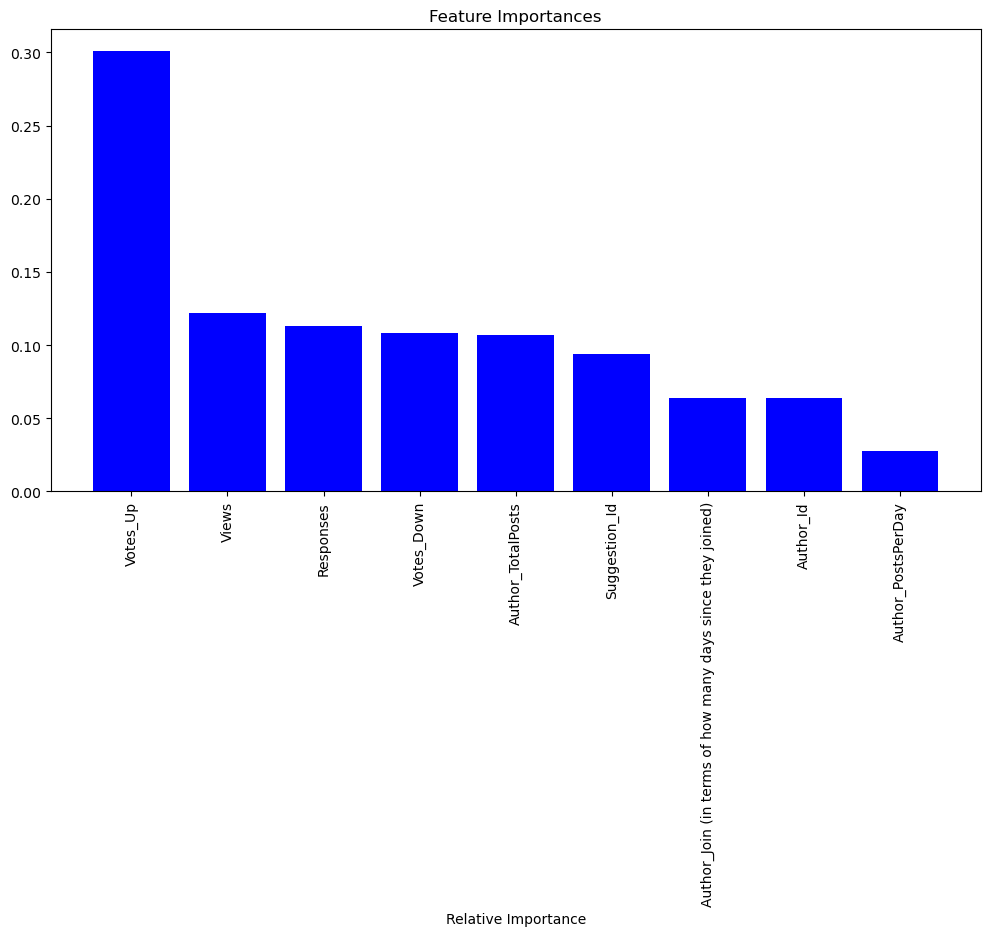

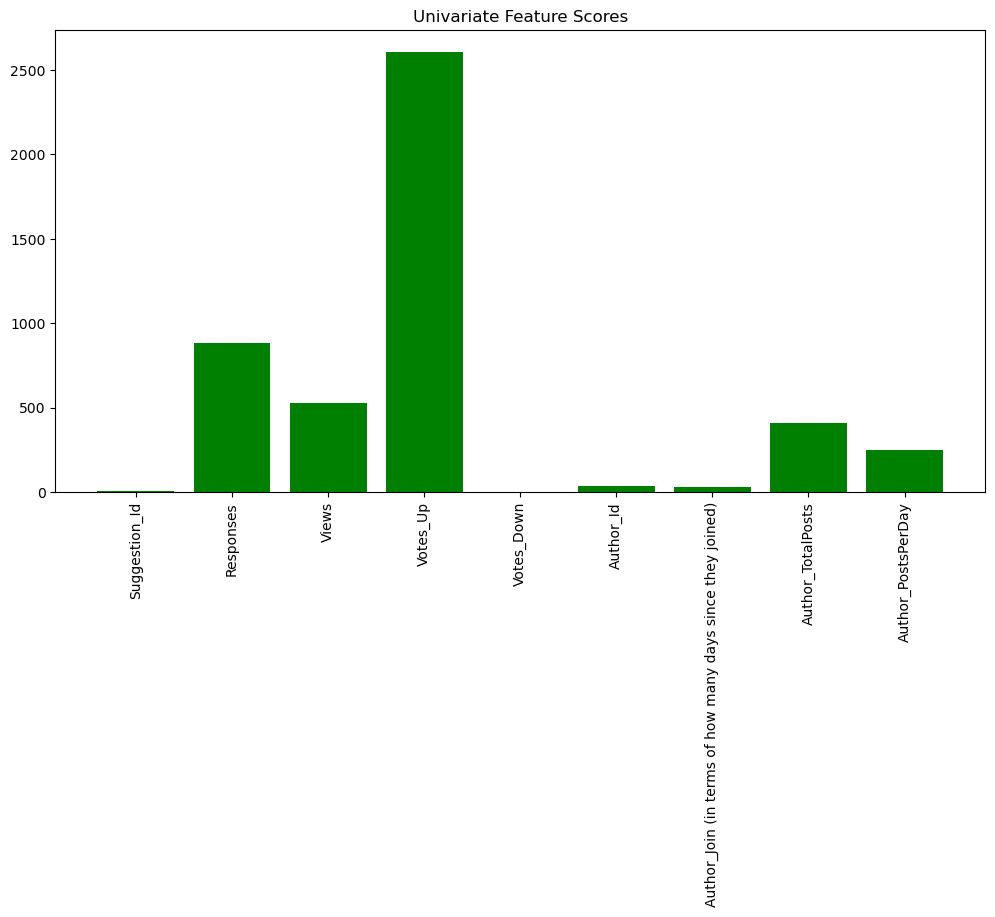

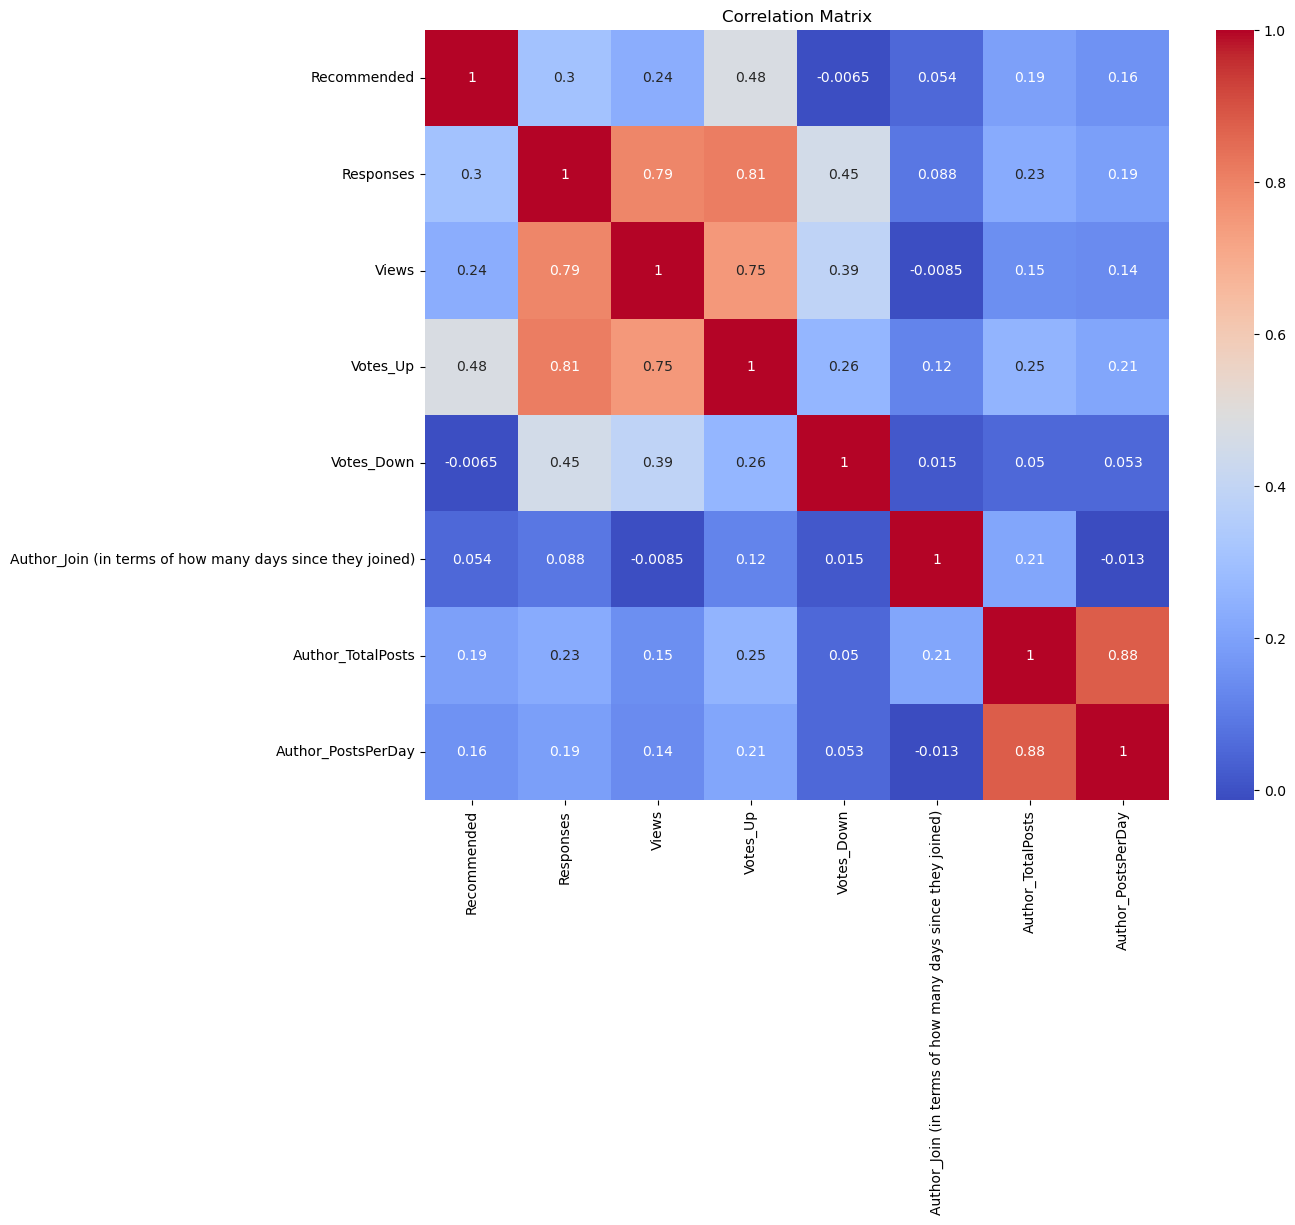

In [45]:
import numpy as np

# Correcting the code with NumPy import for sorting the feature importances

# Feature Importance with Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Correcting the code by defining 'features' properly for the feature importance plot

# Features are the column names from the dataset
features = X.columns

# Re-plotting feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel('Relative Importance')
plt.show()


from sklearn.feature_selection import SelectKBest, f_classif

# Correcting the code by properly importing SelectKBest and f_classif

# Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)
scores = selector.scores_



# Re-plotting the Univariate Feature Selection scores using the original DataFrame column names

# Reusing the 'features' variable which contains the original column names
plt.figure(figsize=(12, 6))
plt.bar(range(len(features)), scores, color='g', align='center')
plt.xticks(range(len(features)), features, rotation=90)
plt.title('Univariate Feature Scores')
plt.show()

# Redefining df_numeric by selecting only numeric columns from the original dataset df
df_numeric = df.select_dtypes(include=['number'])

# Creating the correlation matrix for multicollinearity check
correlation_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [46]:
# Using the identified top 3 features: 'Responses', 'Votes_Up', 'Views'
# And 'Recommended' as the target variable

# Selecting only the top 3 features from the dataset
X_top3 = df[['Responses', 'Votes_Up', 'Views']]

# Splitting the dataset with the top 3 features
X_train_top3, X_test_top3, y_train, y_test = train_test_split(X_top3, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler_top3 = StandardScaler()
X_train_top3_scaled = scaler_top3.fit_transform(X_train_top3)
X_test_top3_scaled = scaler_top3.transform(X_test_top3)

# Re-evaluating the models with only the top 3 features
model_performance_top3 = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_top3_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_top3_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the metrics
    model_performance_top3[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Convert the performance metrics to a DataFrame
performance_df_top3 = pd.DataFrame(model_performance_top3).T
performance_df_top3['Baseline Accuracy'] = baseline_accuracy
performance_df_top3.reset_index().rename(columns={'index': 'Model'})


,Model,Accuracy,Precision,Recall,F1 Score,Baseline Accuracy
0,Logistic Regression,0.978828,0.538462,0.311111,0.394366,0.977843
1,Random Forest,0.976120,0.425532,0.222222,0.291971,0.977843
2,Gradient Boosting,0.976613,0.446809,0.233333,0.306569,0.977843
3,Support Vector Machine,0.977597,0.000000,0.000000,0.000000,0.977843
4,K-Nearest Neighbors,0.977597,0.490909,0.300000,0.372414,0.977843
5,Naive Bayes,0.944609,0.266436,0.855556,0.406332,0.977843


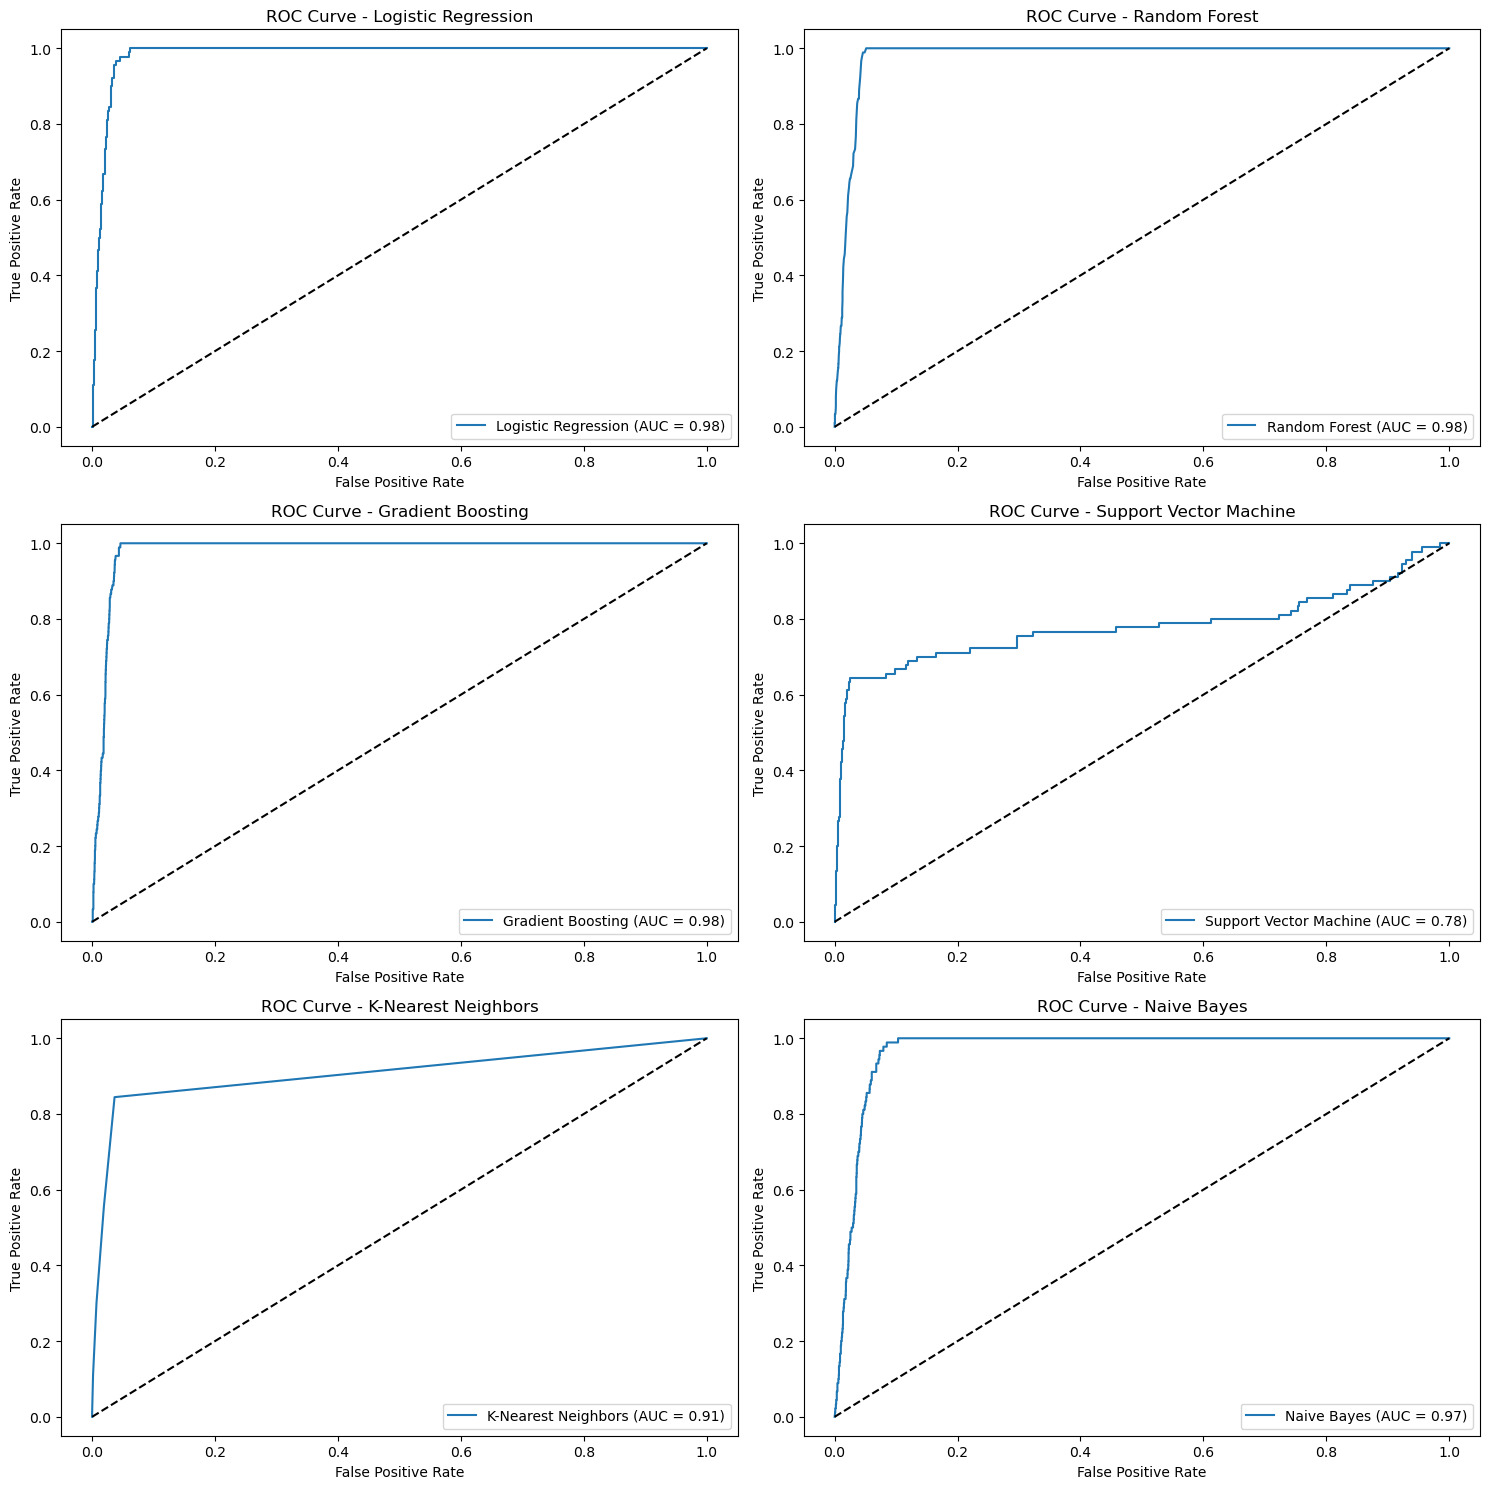

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'Recommended' is the target variable
X = df.drop('Recommended', axis=1)
y = df['Recommended']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Selecting the top 3 features
top_3_features = ['Responses', 'Votes_Up', 'Views']

# Filtering the datasets for top 3 features
X_train_top3 = X_train[top_3_features]
X_test_top3 = X_test[top_3_features]

# Standardizing the features
scaler = StandardScaler()
X_train_top3_scaled = scaler.fit_transform(X_train_top3)
X_test_top3_scaled = scaler.transform(X_test_top3)

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Enable probability for SVM
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Training the models
for model_name, model in models.items():
    model.fit(X_train_top3_scaled, y_train)

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name, ax):
    # Predict probabilities
    if "predict_proba" in dir(model):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:  # Use decision function for models that don't have predict_proba
        y_scores = model.decision_function(X_test)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plotting
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {model_name}')
    ax.legend(loc='lower right')

# Plotting separate ROC curves for each model
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.ravel()

for ax, (model_name, model) in zip(axes, models.items()):
    plot_roc_curve(model, X_test_top3_scaled, y_test, model_name, ax)

plt.tight_layout()
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3972
           1       0.71      0.33      0.45        90

    accuracy                           0.98      4062
   macro avg       0.85      0.67      0.72      4062
weighted avg       0.98      0.98      0.98      4062

Confusion Matrix:
 [[3960   12]
 [  60   30]]
Accuracy Score: 0.982274741506647


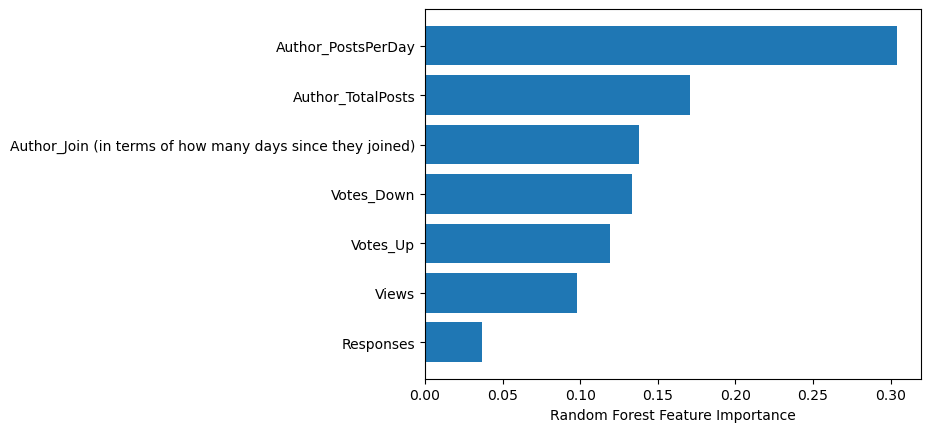

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Selecting the features and the target variable
features = ['Responses', 'Views', 'Votes_Up', 'Votes_Down', 'Author_Join (in terms of how many days since they joined)', 'Author_TotalPosts', 'Author_PostsPerDay']
target = 'Recommended'

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Building the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature importance
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
plt.barh(features, feature_importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()
# Updating the feature selection to include the correct column names
features = ['Responses', 'Views', 'Votes_Up', 'Votes_Down', 'Author_Join (in terms of how many days since they joined)', 'Author_TotalPosts', 'Author_PostsPerDay']



C:\Users\ramya\AppData\Local\Temp\ipykernel_19480\529450011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tenure_Years'] = df['Author_Join (in terms of how many days since they joined)'] / 365
C:\Users\ramya\AppData\Local\Temp\ipykernel_19480\529450011.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(recommended['Tenure_Years'], label='Recommended', shade=True)
C:\Users\ramya\AppData\Local\Temp\ipykernel_19480\529450011.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(not_recommended['

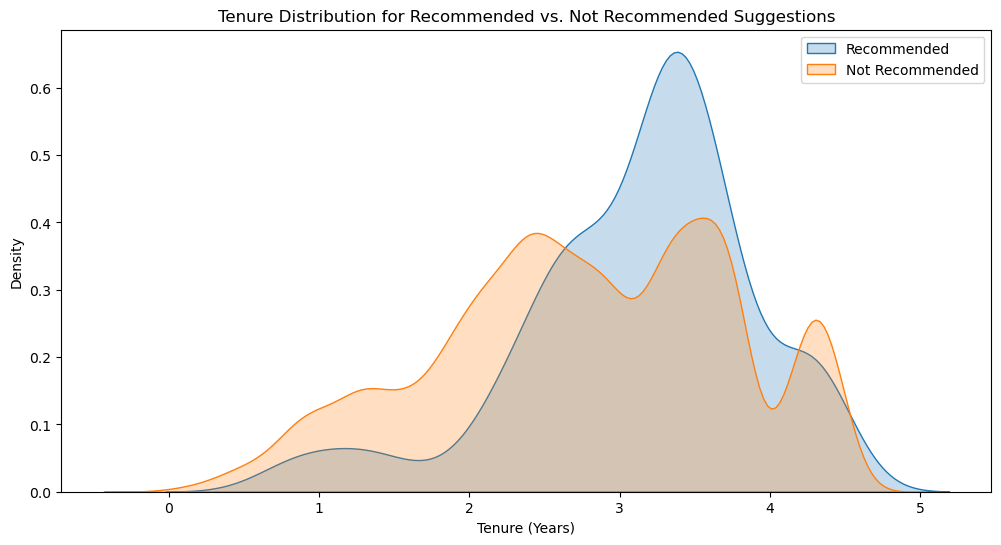

(6.235356293405493, 4.6414600312946834e-10)

In [49]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Convert 'Author_Join' to years for better interpretability
df['Tenure_Years'] = df['Author_Join (in terms of how many days since they joined)'] / 365

# Splitting the data into two groups: Recommended and Not Recommended
recommended = df[df['Recommended'] == 1]
not_recommended = df[df['Recommended'] == 0]

# Perform a t-test to see if there's a significant difference in tenure
t_stat, p_value = ttest_ind(recommended['Tenure_Years'], not_recommended['Tenure_Years'])

# Visualizing the tenure distribution for both groups
plt.figure(figsize=(12, 6))
sns.kdeplot(recommended['Tenure_Years'], label='Recommended', shade=True)
sns.kdeplot(not_recommended['Tenure_Years'], label='Not Recommended', shade=True)
plt.title('Tenure Distribution for Recommended vs. Not Recommended Suggestions')
plt.xlabel('Tenure (Years)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Outputting the t-statistic and p-value
t_stat, p_value

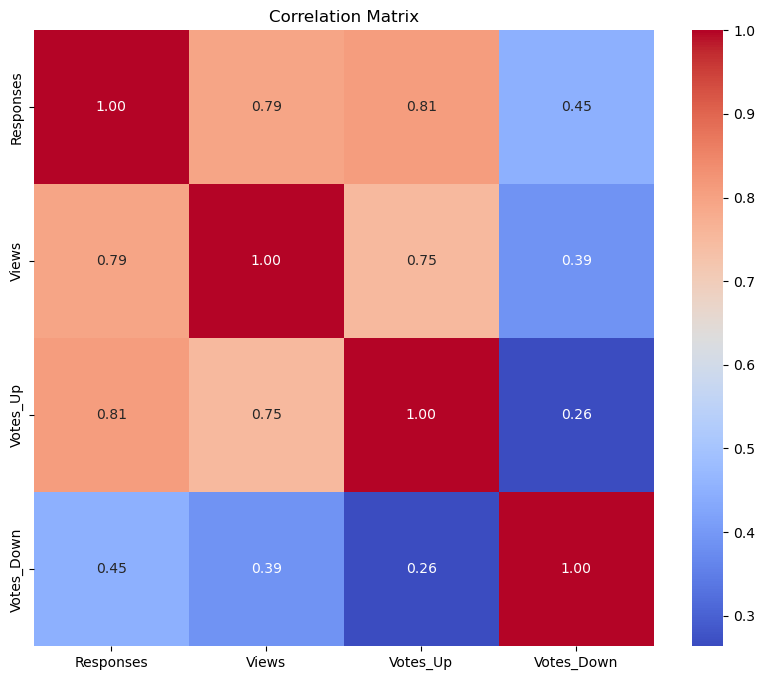

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numeric_columns = ['Responses', 'Views', 'Votes_Up', 'Votes_Down']  # Adjust as per your dataset

# Convert relevant columns to numeric using .loc
for col in numeric_columns:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()